In [30]:
# load libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
from sklearn import metrics 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [31]:
# load both datasets

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
print(f"\nMissing values:\n{train.isnull().sum()}")



Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


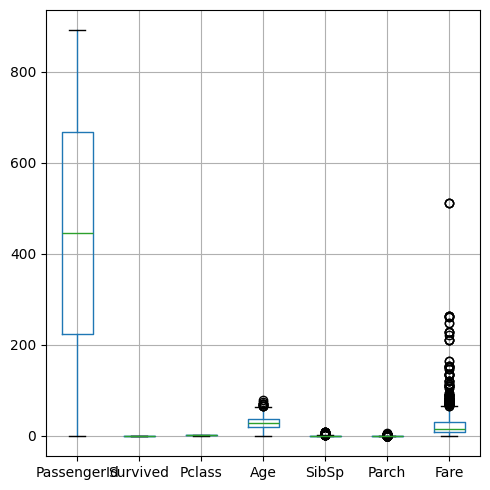

In [34]:
# Lots of nulll values - we need to use a boxplot to understand whether there are many outliers
train.boxplot(figsize=(5,5))
plt.tight_layout()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

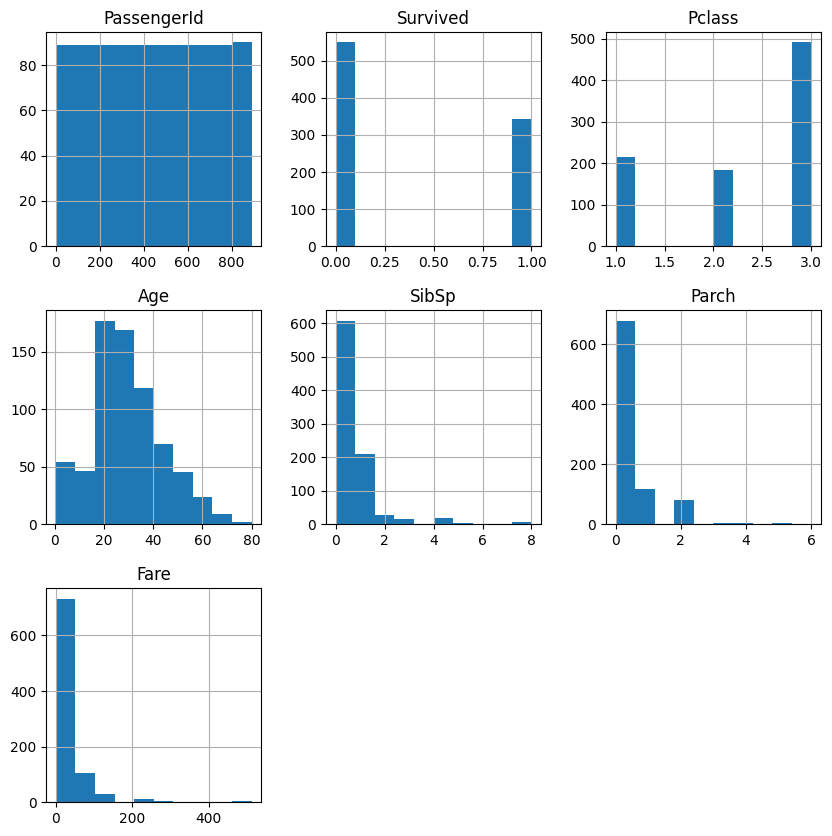

In [35]:
train.hist(figsize=(10,10))

In [36]:
# using median as there is a skew in data 
train['Age']= train['Age'].fillna(train['Age'].median())

# fill embarked with mode as its a category 
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [37]:
# Create new features
train['FamilySize'] = train['SibSp'] + train['Parch']
train['IsAlone'] = (train['FamilySize'] == 0).astype(int)

In [38]:
# lebel encoder for categorical features 

encoder = LabelEncoder()
train['Sex'] = encoder.fit_transform(train['Sex'])
train['Embarked'] = encoder.fit_transform(train['Embarked'])

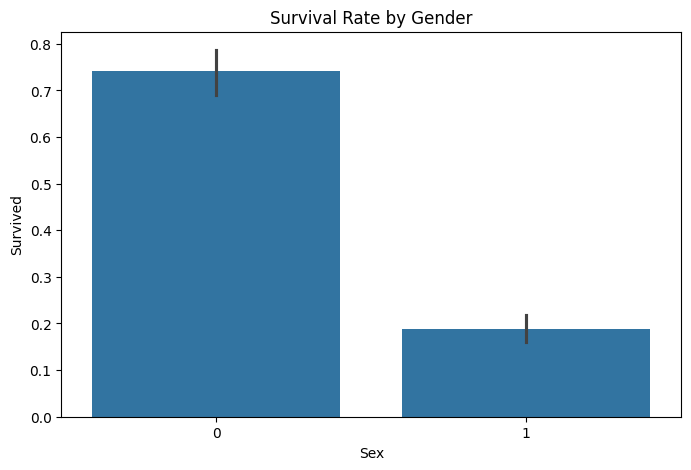

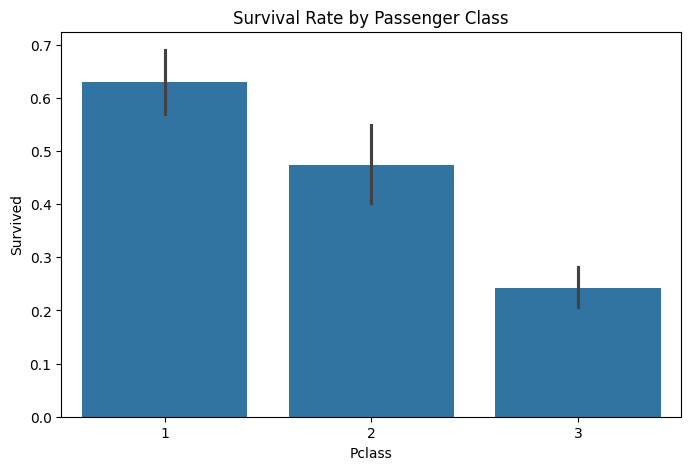

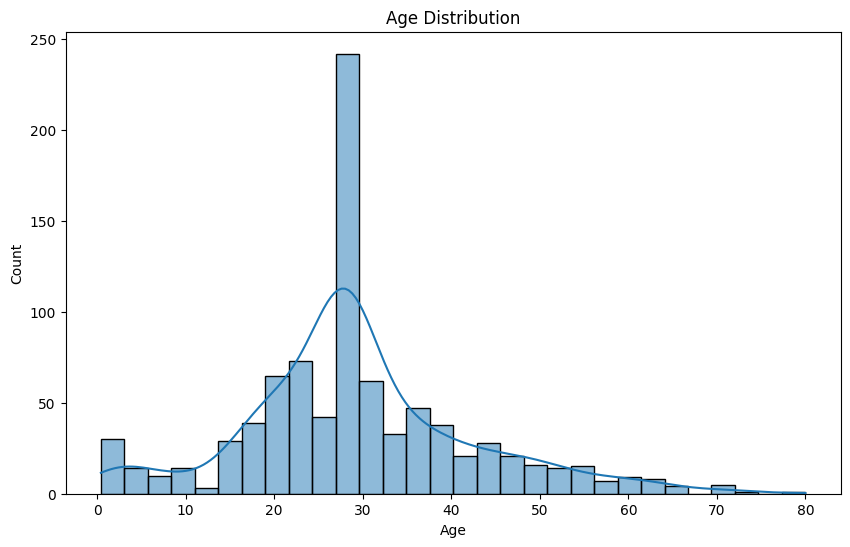

In [39]:
# Survival rate by sex
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by passenger class
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

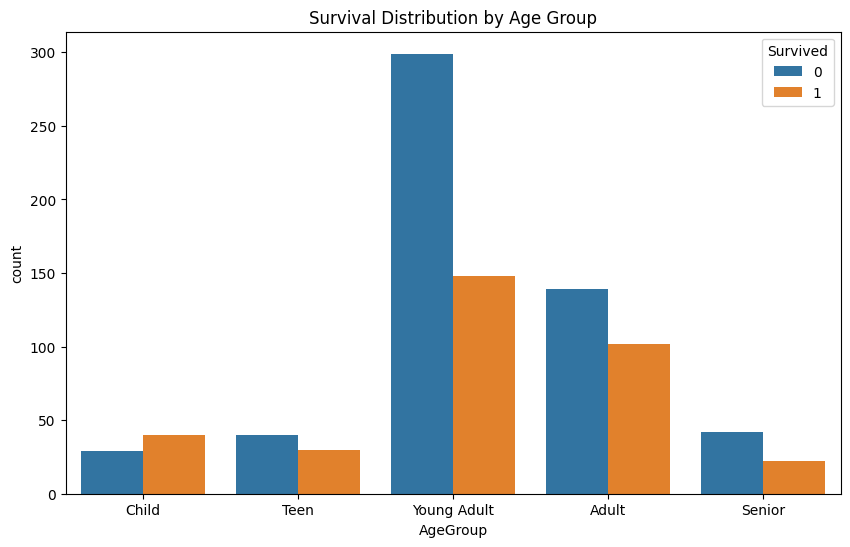

In [40]:
train['AgeGroup'] = pd.cut(train['Age'], 
                          bins=[0, 12, 18, 30, 50, 100], 
                          labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(10,6))
sns.countplot(x='AgeGroup', hue='Survived', data=train)
plt.title('Survival Distribution by Age Group')
plt.show()

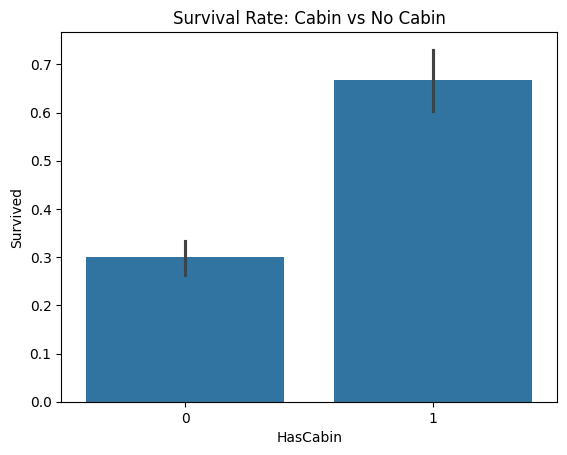

In [41]:
train['HasCabin'] = train['Cabin'].notnull().astype(int)
sns.barplot(x='HasCabin', y='Survived', data=train)
plt.title('Survival Rate: Cabin vs No Cabin')
plt.show()

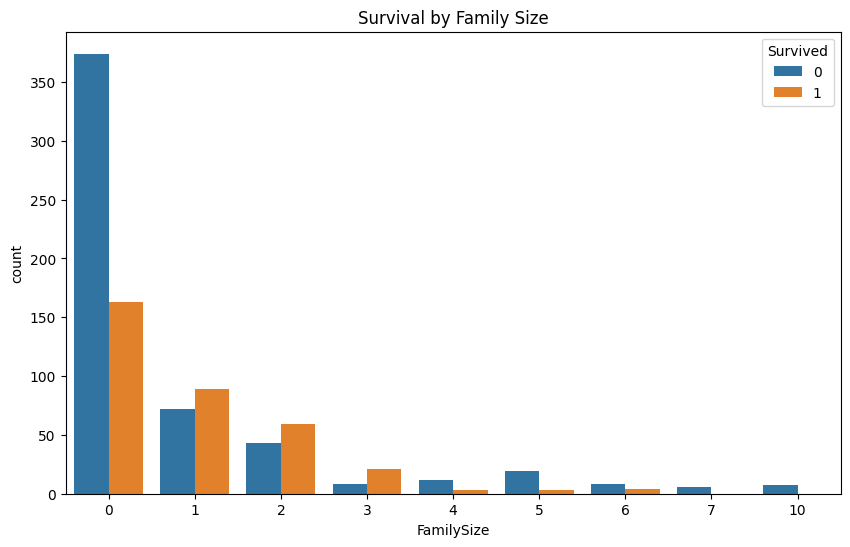

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='FamilySize', hue='Survived', data=train)
plt.title('Survival by Family Size')
plt.show()

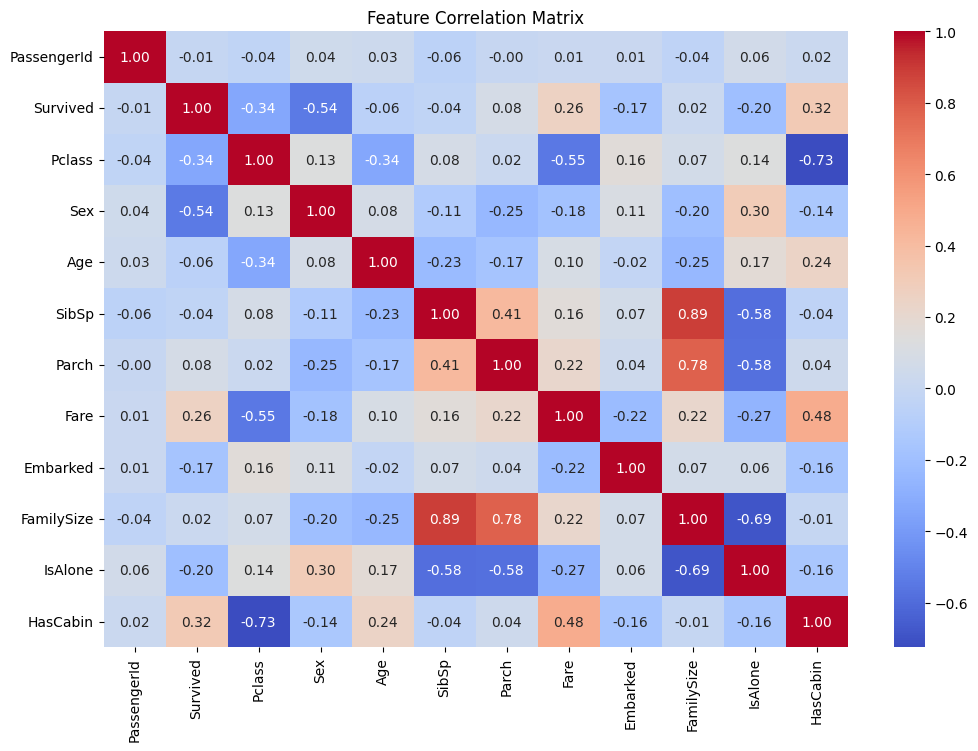

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(numeric_only=True), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [44]:

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = train[features]
y = train['Survived']

In [45]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# feature scalling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# Initialize and train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Predictions
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [49]:
# put into dataframe 
# putting in dataframe 
df = pd.DataFrame({'Actual_Value': y_test , 'Predicted_Value': y_pred})
df

,Actual_Value,Predicted_Value
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


In [50]:
accuracy_score(y_test, y_pred)

0.7988826815642458